In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
N = 210
K = 2
data, label = make_circles(n_samples=N, shuffle=True, noise=0.12, factor=0.4)

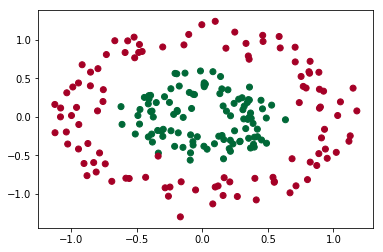

In [26]:
plt.scatter(data[:, 0], data[:, 1], c=label, cmap=plt.cm.RdYlGn)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=0)

In [16]:
points = tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.float64))

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
y_pred = []
for i, j in zip(X_test, y_test):
    distances = tf.reduce_sum(tf.square(i - X_train), axis=1)
    neighbor = tf.argmin(distances, axis=0)
    y_pred.append(y_train[sess.run(neighbor)])

In [23]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98        32
          1       1.00      0.97      0.98        31

avg / total       0.98      0.98      0.98        63

